In [44]:
import h5py
import sys

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from enum import Enum
import collections
from pylab import meshgrid



%matplotlib inline

class FIELD(Enum):
        __order__ = ' VOLUME DENSITY ENERGY PRESSURE TEMPERATURE DIVERGENCES VELOCITY_OUT VELOCITY_CTS VELOCITY_HTS ZONE_CENTR CRD_CENTR CRD_EXT_CENTR'
        VOLUME = [0,['vol_zone','zonem']]
        DENSITY = [1,['dens']]
        ENERGY = [2,['specIntErg']]
        PRESSURE = [3,['pres']]
        TEMPERATURE = [4,['temp']]
        DIVERGENCES = [5,['divi', 'divq']]
        VELOCITY_OUT = [6,['vel_out_0','vel_out_1']]
        VELOCITY_CTS = [7,['vel_cts_0','vel_cts_1']]
        VELOCITY_HTS = [8,['vel_hts_0','vel_hts_1']]
        ZONE_CENTR = [9,['centr_zone_0','centr_zone_1']]
        CRD_CENTR = [10,['coord_0','coord_1']]
        CRD_EXT_CENTR = [11,['crdext_0','crdext_1']]
        
 
                    
def loadData(filePath):           
        f = h5py.File(filePath)
        allData = collections.defaultdict(lambda: np.ndarray(0))
        for fld in FIELD:
                VAR0_name = 'vars/'+fld.value[1][0]
                SHAPE = f[VAR0_name].shape            
                Lx=SHAPE[0]
                Ly=SHAPE[1]
                data = np.zeros([Lx, Ly, 3])
                idx = 0
                for field in fld.value[1]:
                    VAR_name = 'vars/'+field
                    print VAR_name, Lx, Ly
                    data[...,idx] = f[VAR_name][...,0]
                    idx += 1
                    allData[fld] = data                   
        f.close()
        return allData
        


In [50]:
filePath = '/PATH/TO/HYDRO-ALE/output/'
fileName = 'test_template_9.h5'
DATA = loadData(filePath+fileName)

vars/vol_zone 1002 31
vars/zonem 1002 31
vars/dens 1002 31
vars/specIntErg 1002 31
vars/pres 1002 31
vars/temp 1002 31
vars/divi 1002 31
vars/divq 1002 31
vars/vel_out_0 1000 30
vars/vel_out_1 1000 30
vars/vel_cts_0 1000 30
vars/vel_cts_1 1000 30
vars/vel_hts_0 1000 30
vars/vel_hts_1 1000 30
vars/centr_zone_0 1002 31
vars/centr_zone_1 1002 31
vars/coord_0 1000 30
vars/coord_1 1000 30
vars/crdext_0 1004 32
vars/crdext_1 1004 32


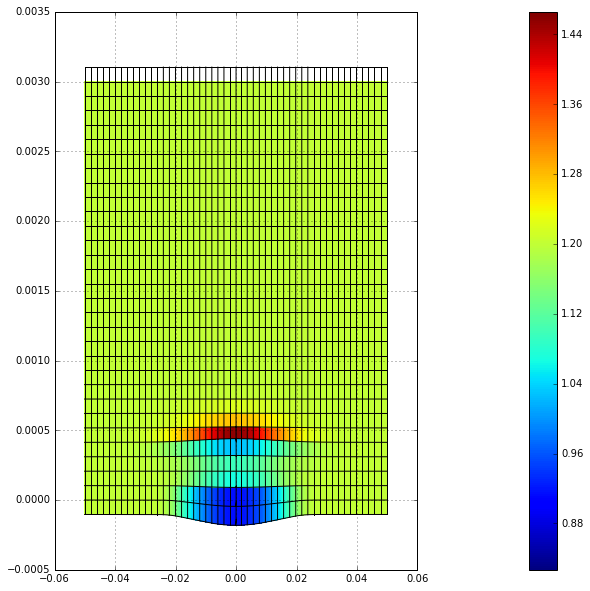

In [51]:
data2Plt = DATA[FIELD.DENSITY][...,0]

coord_x = DATA[FIELD.CRD_EXT_CENTR][...,0]
coord_y = DATA[FIELD.CRD_EXT_CENTR][...,1]

fig, ax = plt.subplots(num = 0, figsize = [10, 10], dpi = 100) 

step_x = 20;
step_y = 1;
Lx = coord_x.shape[0]
Ly = coord_x.shape[1]
for i in range(0, Ly, step_y):
    resy = np.zeros(Lx)
    resx = np.zeros(Lx)
    for j in range(0, Lx):        
        resx[j] = coord_x[j,i]
        resy[j] = coord_y[j,i]        
    ax.plot(resx,resy,"k-")

    
for i in range(0, Lx, step_x):
    resy = np.zeros(Ly)
    resx = np.zeros(Ly)
    for j in range(Ly):        
        resx[j] = coord_x[i,j]
        resy[j] = coord_y[i,j]        
    ax.plot(resx,resy,"k-")
    
im = ax.pcolormesh(coord_x[0:Lx-1,0:Ly-1], coord_y[0:Lx-1,0:Ly-1], data2Plt[0:Lx,0:Ly])
cbar = fig.colorbar(im,  pad = 0.2)
ax.grid()